In [1]:
import random
import os
import glob
import math
os.chdir('Prim')

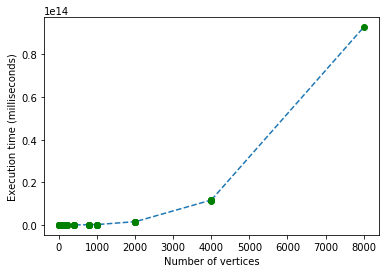

In [12]:
# Naive_Kruskal's algorithm

list_mst_kn = [(10, 389900), (10, 707100), (10, 869400), (10, 710400), (20, 4415600), (20, 2617900), (20, 4988700), (20, 2605400), (40, 17556400), (40, 9705700), (40, 8899500), (40, 16983900), (80, 80207900), (80, 86174900), (80, 68498000), (80, 93556400), (100, 160848400), (100, 125719900), (100, 146410500), (100, 158002400), (200, 1371317000), (200, 1222143900), (200, 1266080600), (200, 1137027500), (400, 9892726900), (400, 8126470100), (400, 9435041500), (400, 10749349800), (800, 87455216100), (800, 83971985400), (800, 88539619900), (800, 80495933600), (1000, 154928314900), (1000, 173284610000), (1000, 168176827800), (1000, 167010259100), (2000, 1526225143000), (2000, 1406172042500), (2000, 1354044347900), (2000, 1483406294600), (4000, 11673397023300), (4000, 11879976526100), (4000, 11223371057900), (4000, 11661045994300), (8000, 92742803429500)]

x_val = []
y_val = []

for (x,y) in list_mst_kn:
    x_val.append(x)
    y_val.append(y)


import matplotlib.pyplot as plt
plt.plot(x_val,y_val,'--')
plt.plot(x_val,y_val,'og')
plt.ylabel("Execution time (milliseconds)")
plt.xlabel("Number of vertices")
plt.show()

In [24]:
def initialize(fileaddress):
    vertices = set()
    edges = [] 
    with open(glob.glob(fileaddress)[0]) as f:
        lines = f.readlines()
    Number_Of_V_E = lines[0].split()
    return Number_Of_V_E

V_E_C = []
for i in os.listdir():
    Number_Of_V_E = initialize(i)
    V_E_C.append((int(Number_Of_V_E[0]),int(Number_Of_V_E[1])))
list_sizes = [item[0] for item in list_mst_kn]
run_times = [item[1] for item in list_mst_kn]

ratios = [None]
for i in range(len(run_times)-1):
    ratios.append(run_times[i+1]/run_times[i])

c_estimates = []
for i in range(len(run_times)):
    V = V_E_C[i][0]
    E = V_E_C[i][1]
    c_estimates.append(run_times[i]/(E * V))

print("Size\t\tTime(ns)\t\t\tCostant\t\t\t\tRatio")
print(100*"-")
for i in range(len(list_sizes)):
    print(list_sizes[i], run_times[i], '', c_estimates[i], '', ratios[i], sep="\t\t")
print(100*"-")

c = sum(c_estimates)/(len(c_estimates)-20)
print("Our average C is: ", c)

Size		Time(ns)			Costant				Ratio
----------------------------------------------------------------------------------------------------
10		389900				4332.222222222223				None
10		707100				6428.181818181818				1.813541933829187
10		869400				6687.692307692308				1.2295290623674162
10		710400				7104.0				0.8171152518978606
20		4415600				9199.166666666666				6.215653153153153
20		2617900				5453.958333333333				0.5928752604402573
20		4988700				8908.392857142857				1.9056113678902937
20		2605400				5010.384615384615				0.5222603082967506
40		17556400				7837.678571428572				6.738466262378138
40		9705700				4852.85				0.5528297373037753
40		8899500				4449.75				0.9169354090895041
40		16983900				8165.336538461538				1.9084105848643182
80		80207900				9283.32175925926				4.722584329865343
80		86174900				10880.669191919193				1.0743941681555058
80		68498000				8232.932692307691				0.7948718246264284
80		93556400				10258.377192982456				1.3658267394668457
100		160848400				11827.0882352

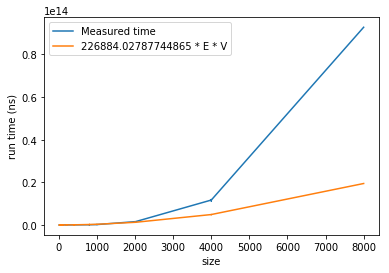

In [25]:
import matplotlib.pyplot as plt

x = []
for i in range(0,45):
    V = V_E_C[i][0]
    E = V_E_C[i][1]
    x.append((V,c * E * V))

import matplotlib.pyplot as plt
results = sorted(x,key=lambda x: x[0])
x_val = [x[0] for x in results]
y_val = [x[1] for x in results]
plt.plot(list_sizes, run_times)
plt.plot(x_val, y_val)
plt.legend(["Measured time", f"{c} * E * V"])
plt.ylabel('run time (ns)')
plt.xlabel('size')
plt.show()

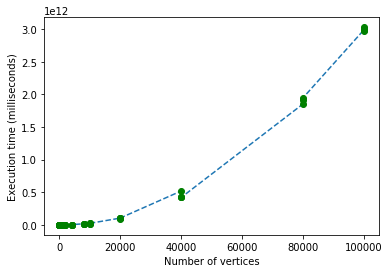

In [26]:
# Efficient_Kruskal's algorithm

list_mst_ke = [(10, 123600), (10, 140300), (10, 118400), (10, 97600), (20, 262300), (20, 157200), (20, 411500), (20, 411800), (40, 863800), (40, 680500), (40, 769100), (40, 394400), (80, 1516300), (80, 2543000), (80, 2102600), (80, 2779300), (100, 2803200), (100, 2498100), (100, 4310800), (100, 1902700), (200, 6203000), (200, 8503900), (200, 9586400), (200, 6814700), (400, 28436700), (400, 26761000), (400, 24963200), (400, 23946900), (800, 97288500), (800, 97037200), (800, 98355000), (800, 91786400), (1000, 144693000), (1000, 131158500), (1000, 144233300), (1000, 228029800), (2000, 1216595600), (2000, 629124200), (2000, 698520400), (2000, 692321200), (4000, 3243682800), (4000, 4238929100), (4000, 3260892300), (4000, 3679921500), (8000, 17991630800), (8000, 19312071900), (8000, 14946513200), (8000, 15995286500), (10000, 20194239200), (10000, 23098062800), (10000, 19421755100), (10000, 24461997100), (20000, 104352594700), (20000, 100763717600), (20000, 93858074100), (20000, 105518140400), (40000, 519229715800), (40000, 428385295500), (40000, 427882586100), (40000, 420200641300), (80000, 1850763124400), (80000, 1910535786300), (80000, 1944684969000), (100000, 2984325137000), (100000, 3027087050900), (100000, 2963795837600), (100000, 3003450633700)]

x_val = []
y_val = []

for (x,y) in list_mst_ke:
    x_val.append(x)
    y_val.append(y)


import matplotlib.pyplot as plt
plt.plot(x_val,y_val,'--')
plt.plot(x_val,y_val,'og')
plt.ylabel("Execution time (milliseconds)")
plt.xlabel("Number of vertices")
plt.show()

In [27]:
def initialize(fileaddress):
    vertices = set()
    edges = [] 
    with open(glob.glob(fileaddress)[0]) as f:
        lines = f.readlines()
    Number_Of_V_E = lines[0].split()
    return Number_Of_V_E

V_E_C = []
for i in os.listdir():
    Number_Of_V_E = initialize(i)
    V_E_C.append((int(Number_Of_V_E[0]),int(Number_Of_V_E[1])))
list_sizes = [item[0] for item in list_mst_ke]
run_times = [item[1] for item in list_mst_ke]

ratios = [None]
for i in range(len(run_times)-1):
    ratios.append(run_times[i+1]/run_times[i])

c_estimates = []
for i in range(len(run_times)):
    V = V_E_C[i][0]
    E = V_E_C[i][1]
    c_estimates.append(run_times[i]/( E * math.log(V)))

print("Size\t\tTime(ns)\t\t\tCostant\t\t\t\tRatio")
print(100*"-")
for i in range(len(list_sizes)):
    print(list_sizes[i], run_times[i], '', c_estimates[i], '', ratios[i], sep="\t\t")
print(100*"-")

c = sum(c_estimates)/(len(c_estimates)-50)
print("Our average C is: ", c)

Size		Time(ns)			Costant				Ratio
----------------------------------------------------------------------------------------------------
10		123600				5964.310884804658				None
10		140300				5539.228710093294				1.1351132686084142
10		118400				3955.4205121034624				0.8439059158945118
10		97600				4238.714143375737				0.8243243243243243
20		262300				3648.245460099422				2.6875
20		157200				2186.443714554438				0.5993137628669463
20		411500				4905.78837807607				2.617684478371501
20		411800				5287.008347936098				1.0007290400972053
40		863800				4181.486598267024				2.097620203982516
40		680500				3689.467267579527				0.787798101412364
40		769100				4169.829941947706				1.1301983835415137
40		394400				2056.0756942482412				0.5128071772201275
80		1516300				3203.9546961493274				3.844574036511156
80		2543000				5861.869593309843				1.6771087515663128
80		2102600				4613.6889110470465				0.8268187180495478
80		2779300				5563.595704437771				1.3218396271283173
100		2803200				4475.7878

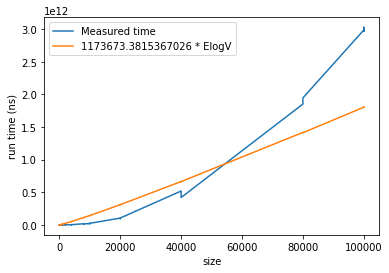

In [28]:
import matplotlib.pyplot as plt

x = []
for i in range(len(V_E_C)):
    V = V_E_C[i][0]
    E = V_E_C[i][1]
    x.append((V,c * E * math.log(V)))

import matplotlib.pyplot as plt
results = sorted(x,key=lambda x: x[0])
x_val = [x[0] for x in results]
y_val = [x[1] for x in results]
plt.plot(list_sizes, run_times)
plt.plot(x_val, y_val)
plt.legend(["Measured time", f"{c} * ElogV"])
plt.ylabel('run time (ns)')
plt.xlabel('size')
plt.show()

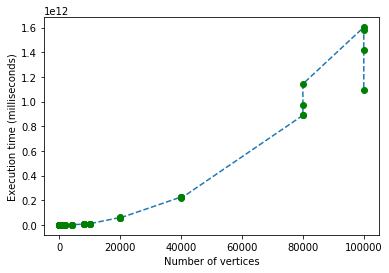

In [29]:
# Prim's algorithm

list_mst_prim = [(10, 4355300), (10, 128100), (10, 107400), (10, 99400), (20, 3421300), (20, 238200), (20, 282500), (20, 287100), (40, 7247600), (40, 654500), (40, 325800), (40, 494100), (80, 9702400), (80, 1700400), (80, 1733100), (80, 1696300), (100, 5735700), (100, 2028500), (100, 2030500), (100, 1152300), (200, 13903200), (200, 5166600), (200, 4637500), (200, 3602800), (400, 31708700), (400, 15091700), (400, 17149700), (400, 15300800), (800, 56447400), (800, 46558800), (800, 35771100), (800, 35466200), (1000, 66592100), (1000, 53684800), (1000, 53848500), (1000, 62211300), (2000, 326068800), (2000, 406340500), (2000, 364582400), (2000, 319829000), (4000, 1202567900), (4000, 1305049400), (4000, 1190213300), (4000, 1407215900), (8000, 6204968500), (8000, 5794934800), (8000, 5814232600), (8000, 6311198700), (10000, 11173796700), (10000, 9897901000), (10000, 10710801000), (10000, 9994435300), (20000, 60371450600), (20000, 55051547700), (20000, 54955554100), (20000, 57129661100), (40000, 226272122200), (40000, 226766523100), (40000, 225438016300), (40000, 216775374500), (80000, 888661425100), (80000, 891350400300), (80000, 974431796400), (80000, 1143032363900), (100000, 1602818212400), (100000, 1579950916500), (100000, 1420967900800), (100000, 1091998307900)]

x_val = []
y_val = []

for (x,y) in list_mst_prim:
    x_val.append(x)
    y_val.append(y)


import matplotlib.pyplot as plt
plt.plot(x_val,y_val,'--')
plt.plot(x_val,y_val,'og')
plt.ylabel("Execution time (milliseconds)")
plt.xlabel("Number of vertices")
plt.show()

In [30]:
def initialize(fileaddress):
    vertices = set()
    edges = [] 
    with open(glob.glob(fileaddress)[0]) as f:
        lines = f.readlines()
    Number_Of_V_E = lines[0].split()
    return Number_Of_V_E

V_E_C = []
for i in os.listdir():
    Number_Of_V_E = initialize(i)
    V_E_C.append((int(Number_Of_V_E[0]),int(Number_Of_V_E[1])))
list_sizes = [item[0] for item in list_mst_prim]
run_times = [item[1] for item in list_mst_prim]

ratios = [None]
for i in range(len(run_times)-1):
    ratios.append(run_times[i+1]/run_times[i])

c_estimates = []
for i in range(len(run_times)):
    V = V_E_C[i][0]
    E = V_E_C[i][1]
    c_estimates.append(run_times[i]/( E * math.log(V)))

print("Size\t\tTime(ns)\t\t\tCostant\t\t\t\tRatio")
print(100*"-")
for i in range(len(list_sizes)):
    print(list_sizes[i], run_times[i], '', c_estimates[i], '', ratios[i], sep="\t\t")
print(100*"-")

c = sum(c_estimates)/(len(c_estimates)-50) #to try and get the upper side of the constant, computing the average is not good enough
print("Our average C is: ", c)

Size		Time(ns)			Costant				Ratio
----------------------------------------------------------------------------------------------------
10		4355300				210164.75078147027				None
10		128100				5057.556648346051				0.02941244001561316
10		107400				3587.940565877634				0.8384074941451991
10		99400				4316.887150118322				0.925512104283054
20		3421300				47585.749876622765				34.41951710261569
20		238200				3313.0463919011904				0.0696226580539561
20		282500				3367.8863105868527				1.1859781696053737
20		287100				3686.012862293477				1.016283185840708
40		7247600				35084.21193517028				25.244165795889934
40		654500				3548.503051624982				0.09030575638832165
40		325800				1766.3900599227184				0.49778456837280366
40		494100				2575.829108843955				1.5165745856353592
80		9702400				20501.253079152695				19.63651082776766
80		1700400				3919.5922361242856				0.17525560686015831
80		1733100				3802.9031921124497				1.0192307692307692
80		1696300				3395.649045960419				0.9787663723962842
1

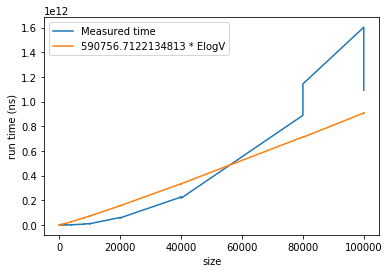

In [31]:
import matplotlib.pyplot as plt

x = []
for i in range(len(V_E_C)):
    V = V_E_C[i][0]
    E = V_E_C[i][1]
    x.append((V,c * E * math.log(V)))

import matplotlib.pyplot as plt
results = sorted(x,key=lambda x: x[0])
x_val = [x[0] for x in results]
y_val = [x[1] for x in results]
plt.plot(list_sizes, run_times)
plt.plot(x_val, y_val)
plt.legend(["Measured time", f"{c} * ElogV"])
plt.ylabel('run time (ns)')
plt.xlabel('size')
plt.show()